# Book Review Sentiment Analysis and Book Recommendation System

### Team Members:
1. Aishwarya Sinhasane
2. Anuj Mahajan
3. Shashwati Diware
4. Shubham Jambhale

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anujmahajan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anujmahajan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anujmahajan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anujmahajan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
# books_rating = pd.read_csv(path+'Books_rating.csv')
books_rating = pd.read_csv('Books_rating.csv')
books_rating.head()


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [53]:
books_data = pd.read_csv('books_data.csv')
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [54]:
books_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  50000 non-null  object 
 1   Title               49999 non-null  object 
 2   Price               7254 non-null   float64
 3   User_id             40484 non-null  object 
 4   profileName         40483 non-null  object 
 5   review/helpfulness  50000 non-null  object 
 6   review/score        50000 non-null  float64
 7   review/time         50000 non-null  int64  
 8   review/summary      50000 non-null  object 
 9   review/text         50000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.8+ MB


In [55]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          49999 non-null  object 
 1   description    36968 non-null  object 
 2   authors        46548 non-null  object 
 3   image          41330 non-null  object 
 4   previewLink    48665 non-null  object 
 5   publisher      35100 non-null  object 
 6   publishedDate  48247 non-null  object 
 7   infoLink       48665 non-null  object 
 8   categories     44053 non-null  object 
 9   ratingsCount   12669 non-null  float64
dtypes: float64(1), object(9)
memory usage: 3.8+ MB


In [56]:
data_sem = pd.merge(books_rating,books_data, on = 'Title')
data_sem.shape

(50000, 19)

# Data Preprocessing

In [57]:
data_sem.drop_duplicates(inplace = True)
data_sem.shape

(49874, 19)

In [58]:
nan_cols = data_sem.columns[data_sem.isna().any()].tolist()
print(nan_cols)
data_sem.isna().sum()

['Title', 'Price', 'User_id', 'profileName', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']


Id                        0
Title                     1
Price                 42638
User_id                9470
profileName            9471
review/helpfulness        0
review/score              0
review/time               0
review/summary            0
review/text               0
description            8780
authors                2206
image                  6102
previewLink             912
publisher             11807
publishedDate          1150
infoLink                912
categories             6197
ratingsCount          23650
dtype: int64

In [59]:
df_processed= data_sem.drop(['Price','description'],axis=1)
df_processed = df_processed.dropna(subset=['review/summary','Title', 'review/text'])

In [60]:
df_processed['authors'] = df_processed['authors'].str.extract(r'\'(.*)\'')
df_processed['categories'] = df_processed['categories'].str.extract(r'\'(.*)\'')
df_processed['word_count'] = df_processed['review/text'].apply(lambda x: len(x.split(' ')))

nan_cols = df_processed.columns[df_processed.isna().any()].tolist()
print(nan_cols)
df_processed.isna().sum()

['User_id', 'profileName', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']


Id                        0
Title                     0
User_id                9470
profileName            9471
review/helpfulness        0
review/score              0
review/time               0
review/summary            0
review/text               0
authors                2287
image                  6102
previewLink             912
publisher             11806
publishedDate          1150
infoLink                912
categories             6746
ratingsCount          23650
word_count                0
dtype: int64

In [61]:
df_processed['categories'].fillna('Other', inplace=True)
df_processed['authors'].fillna('Unknown', inplace=True)
df_processed['previewLink'].fillna('Unknown', inplace=True)
df_processed['infoLink'].fillna('Unknown', inplace=True)
df_processed.head(20)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,word_count
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Comics & Graphic Novels,NaN,86
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,252
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,310
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,560
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,273
5,0826414346,Dr. Seuss: American Icon,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,298
6,0826414346,Dr. Seuss: American Icon,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,87
7,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,210
8,0826414346,Dr. Seuss: American Icon,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...,Philip Nel,http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,63
9,0826414346,Dr. Seuss: American Icon,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l...",Philip Nel,http://books.google.com/books/content?id=Ij

In [62]:
df_processed_subset = df_processed[~df_processed.ratingsCount.isna()]
df_processed_subset.shape

df_processed_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26223 entries, 47 to 49999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  26223 non-null  object 
 1   Title               26223 non-null  object 
 2   User_id             21218 non-null  object 
 3   profileName         21218 non-null  object 
 4   review/helpfulness  26223 non-null  object 
 5   review/score        26223 non-null  float64
 6   review/time         26223 non-null  int64  
 7   review/summary      26223 non-null  object 
 8   review/text         26223 non-null  object 
 9   authors             26223 non-null  object 
 10  image               24506 non-null  object 
 11  previewLink         26223 non-null  object 
 12  publisher           21576 non-null  object 
 13  publishedDate       26210 non-null  object 
 14  infoLink            26223 non-null  object 
 15  categories          26223 non-null  object 
 16  rat

In [63]:
df_processed= df_processed_subset.drop(['profileName','review/helpfulness', 'review/time', 'previewLink','infoLink', 'word_count'],axis=1)

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26223 entries, 47 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              26223 non-null  object 
 1   Title           26223 non-null  object 
 2   User_id         21218 non-null  object 
 3   review/score    26223 non-null  float64
 4   review/summary  26223 non-null  object 
 5   review/text     26223 non-null  object 
 6   authors         26223 non-null  object 
 7   image           24506 non-null  object 
 8   publisher       21576 non-null  object 
 9   publishedDate   26210 non-null  object 
 10  categories      26223 non-null  object 
 11  ratingsCount    26223 non-null  float64
dtypes: float64(2), object(10)
memory usage: 2.6+ MB


In [64]:
df_processed.to_csv('recommendation.csv')

In [65]:
# initialize NLTK objects for text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# define functions for text preprocessing
def clean_text(text):
    # remove urls
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # remove unwanted characters
    text = re.sub(r'[^\w\s]', '', text)
    # remove @ and # symbols
    text = re.sub(r'@\w+|\#', '', text)
    # convert to lowercase
    text = text.lower()
    # remove stopwords and lemmatize words
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df_processed.head()

,Id,Title,User_id,review/score,review/summary,review/text,authors,image,publisher,publishedDate,categories,ratingsCount
47,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0
48,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A36TPZSH8LBT1,5.0,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0
49,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ANX3DDV12ZRRU,4.0,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0
50,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A2H2LORTA5EZY2,4.0,Christ is Lord,This is a very useful and thorough text book. ...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0
52,B000JINSBG,A Walk in the Woods: a Play in Two Acts,A15A5KPP3AL76U,5.0,meaty and fast,"This play was excellent. It's very smart, inte...",Lee Blessing,NaN,NaN,1988,Other,3.0


## Sentiment Analysis

In [66]:
df_processed['cleaned_review/text'] = df_processed['review/text'].apply(clean_text)

df_processed.to_csv("df_processed_nltk.csv")

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_processed['sentiment_score'] = df_processed['cleaned_review/text'].apply(lambda x: sia.polarity_scores(x)['compound'])

df_processed.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anujmahajan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Id,Title,User_id,review/score,review/summary,review/text,authors,image,publisher,publishedDate,categories,ratingsCount,cleaned_review/text,sentiment_score
47,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,publication everett fergusons book ecclesiolog...,0.9982
48,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A36TPZSH8LBT1,5.0,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,everett ferguson approach subject early christ...,0.1010
49,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ANX3DDV12ZRRU,4.0,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,book continual resource biblical simple dr fer...,0.8834
50,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A2H2LORTA5EZY2,4.0,Christ is Lord,This is a very useful and thorough text book. ...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,useful thorough text book would recommend anyo...,0.6908
52,B000JINSBG,A Walk in the Woods: a Play in Two Acts,A15A5KPP3AL76U,5.0,meaty and fast,"This play was excellent. It's very smart, inte...",Lee Blessing,NaN,NaN,1988,Other,3.0,play excellent smart intellectually morally me...,0.9633


In [68]:
df_processed.to_csv("df_processed_sentiment.csv")

df_processed['score'] = df_processed['review/score']*df_processed['sentiment_score']

df_processed.head()

,Id,Title,User_id,review/score,review/summary,review/text,authors,image,publisher,publishedDate,categories,ratingsCount,cleaned_review/text,sentiment_score,score
47,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,publication everett fergusons book ecclesiolog...,0.9982,4.9910
48,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A36TPZSH8LBT1,5.0,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,everett ferguson approach subject early christ...,0.1010,0.5050
49,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ANX3DDV12ZRRU,4.0,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,book continual resource biblical simple dr fer...,0.8834,3.5336
50,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A2H2LORTA5EZY2,4.0,Christ is Lord,This is a very useful and thorough text book. ...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,useful thorough text book would recommend anyo...,0.6908,2.7632
52,B000JINSBG,A Walk in the Woods: a Play in Two Acts,A15A5KPP3AL76U,5.0,meaty and fast,"This play was excellent. It's very smart, inte...",Lee Blessing,NaN,NaN,1988,Other,3.0,play excellent smart intellectually morally me...,0.9633,4.8165


In [69]:
df_processed.to_csv("user_based_recommendation.csv")

In [70]:
df_processed['publishedDate'] = df_processed['publishedDate'].astype(str)
df_processed['publishYear'] = df_processed['publishedDate'].str.replace('-', '').str[:4]
df_processed = df_processed.drop(columns=['publishedDate'])
df_filtered = df_processed[(df_processed['publishYear'] == '2021') | (df_processed['publishYear'] == '2022')]

In [71]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 5886 to 45718
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   399 non-null    object 
 1   Title                399 non-null    object 
 2   User_id              341 non-null    object 
 3   review/score         399 non-null    float64
 4   review/summary       399 non-null    object 
 5   review/text          399 non-null    object 
 6   authors              399 non-null    object 
 7   image                158 non-null    object 
 8   publisher            158 non-null    object 
 9   categories           399 non-null    object 
 10  ratingsCount         399 non-null    float64
 11  cleaned_review/text  399 non-null    object 
 12  sentiment_score      399 non-null    float64
 13  score                399 non-null    float64
 14  publishYear          399 non-null    object 
dtypes: float64(4), object(11)
memory us

In [72]:
df_filtered.to_csv('popularity.csv')

## EDA

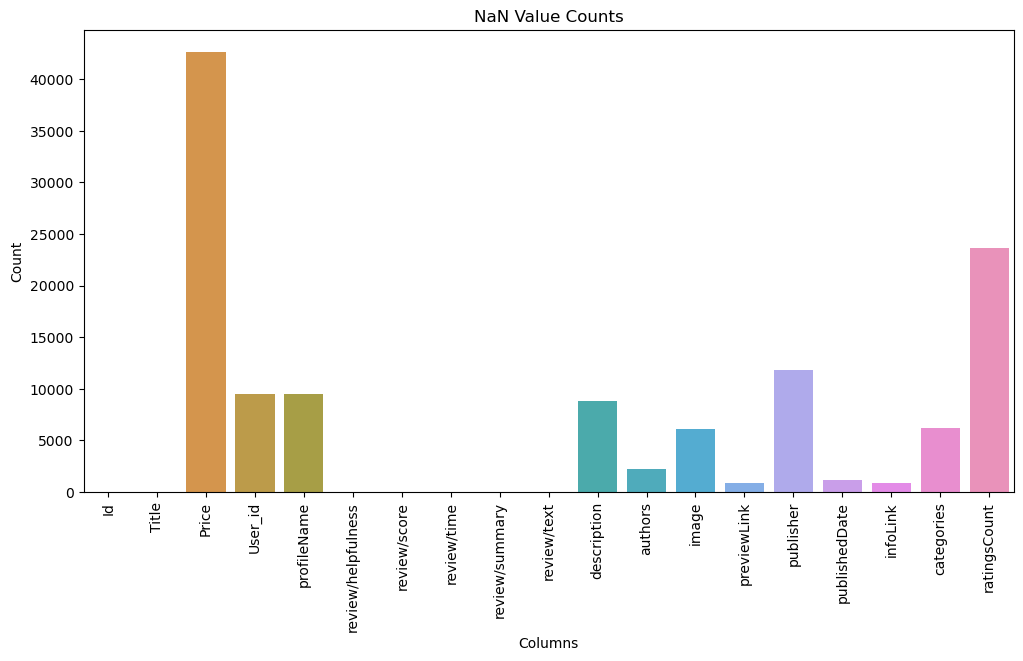

In [75]:
nan_counts = data_sem.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=90)
plt.title('NaN Value Counts')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

### Average rating score of books

In [76]:
df_stat = df_processed.groupby('Title')['review/score'].mean().reset_index()
df_stat

,Title,review/score
0,"'night, Mother: A Play (Mermaid Dramabook)",4.800000
1,.NET Multithreading,3.444444
2,101 Cataclysms: For the Love of Cats,4.833333
3,103 Great Poems: A Dual-Language Book (Dover D...,3.666667
4,1634: The Ram Rebellion (Assiti Shards),2.557143
...,...,...
857,ZOMBIE LOVER (XANTH),4.000000
858,Zorba the Greek,4.472527
859,"albert einstein, young thinker [ Childhood of ...",4.400000
860,in the Pronaos of the Temple of Wisdom,5.000000


In [77]:
df_stat = df_stat.sort_values(by='review/score',ascending = False, ignore_index = True)
df_stat

,Title,review/score
0,"The Declaration of independence,: A study in t...",5.0
1,Put Yourself on the Fast Track,5.0
2,Selected poetry and prose (Rinehart editions),5.0
3,"Islands, Islands, Islands",5.0
4,Shrimp & Spey Flies for Salmon & Steelhead,5.0
...,...,...
857,Hang By Your Neck,1.0
858,Scroll Saw: Plain & Simple Fun (Scroll Saw Pat...,1.0
859,An Introduction to the Methods of Optical Crys...,1.0
860,Oil Field Chemicals,1.0


In [78]:
bins = [0, 2, 3, 4, 5]

# create labels for the bins
labels = ['Bad', 'Okay', 'Good', 'Excellent']

# create a new column 'Bucket' based on the bins and labels
df_stat['rating_label'] = pd.cut(df_stat['review/score'], bins=bins, labels=labels)

In [79]:
df_stat

,Title,review/score,rating_label
0,"The Declaration of independence,: A study in t...",5.0,Excellent
1,Put Yourself on the Fast Track,5.0,Excellent
2,Selected poetry and prose (Rinehart editions),5.0,Excellent
3,"Islands, Islands, Islands",5.0,Excellent
4,Shrimp & Spey Flies for Salmon & Steelhead,5.0,Excellent
...,...,...,...
857,Hang By Your Neck,1.0,Bad
858,Scroll Saw: Plain & Simple Fun (Scroll Saw Pat...,1.0,Bad
859,An Introduction to the Methods of Optical Crys...,1.0,Bad
860,Oil Field Chemicals,1.0,Bad


In [80]:
x = pd.DataFrame(df_stat['rating_label'].value_counts().reset_index())
x

,index,rating_label
0,Excellent,583
1,Good,231
2,Okay,39
3,Bad,9


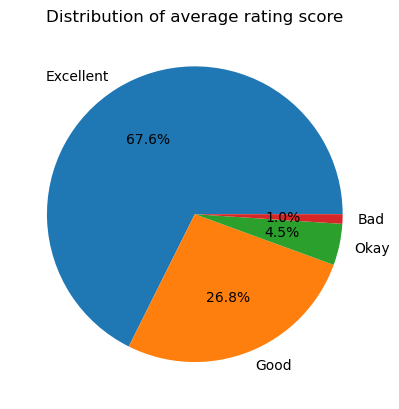

In [81]:
plt.pie(x['rating_label'], labels=x['index'], autopct='%1.1f%%')
plt.title('Distribution of average rating score')
plt.show()

### Distribution of Categories

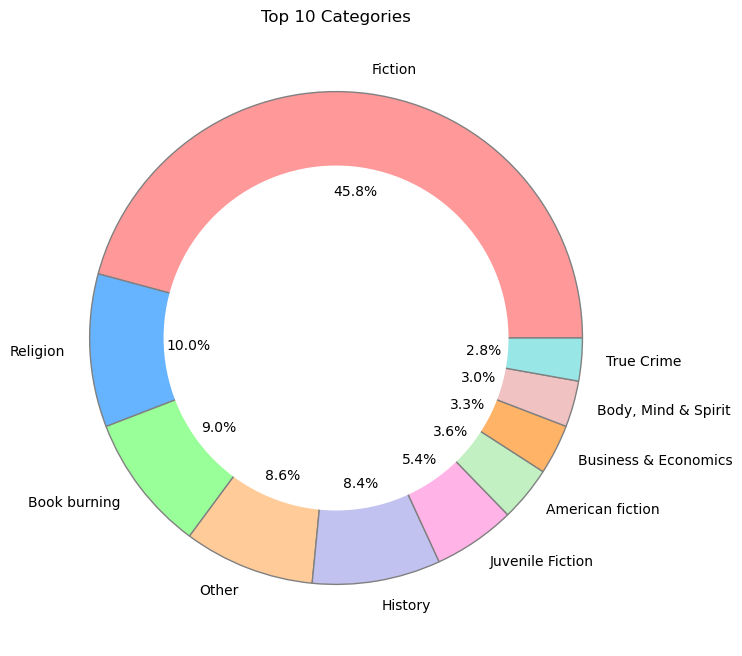

In [82]:
category_counts = df_processed['categories'].value_counts()
top_categories = category_counts.head(10)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366', '#f0c2c2', '#99e6e6']

fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'grey'})

center_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(center_circle)

ax.set_title('Top 10 Categories')

plt.show()




### Top Authors

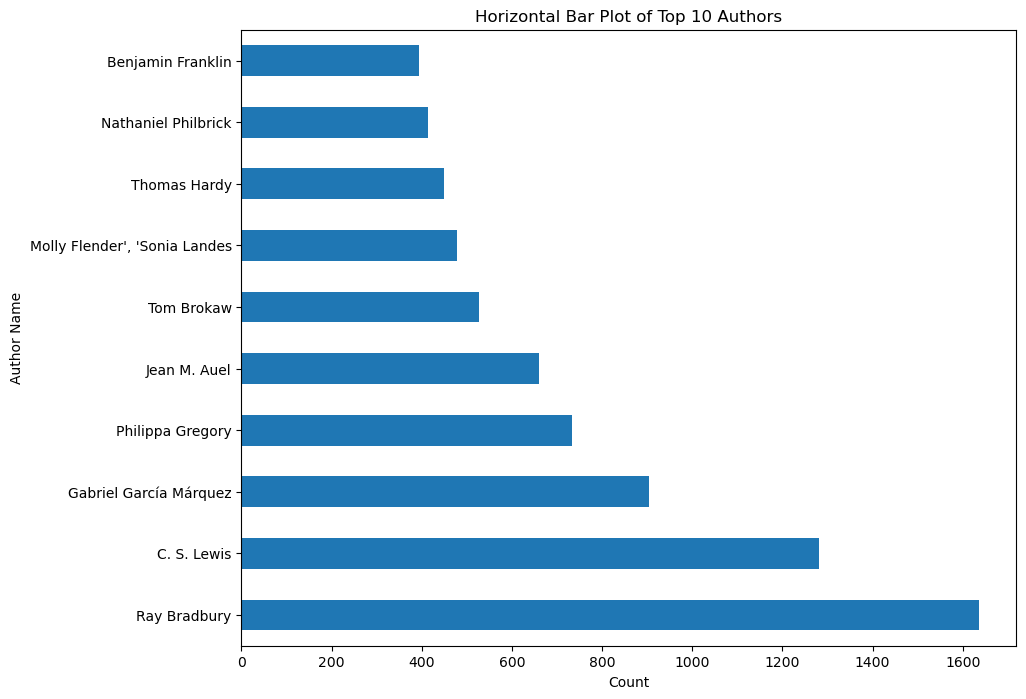

In [83]:
author_counts =df_processed['authors'].value_counts()

top_preview = author_counts.head(10)

plt.figure(figsize=(10, 8))
top_preview.plot(kind='barh', stacked=True)

plt.xlabel('Count')
plt.ylabel('Author Name')
plt.title('Horizontal Bar Plot of Top 10 Authors')

# Display the plot
plt.show()

### Category Vs Count

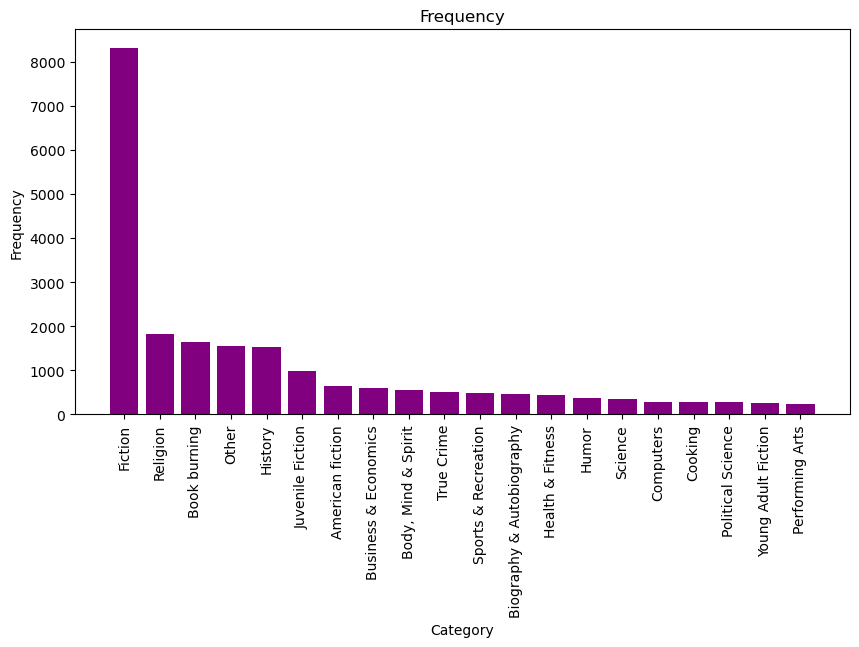

In [85]:
category_counts = df_processed['categories'].value_counts().head(20).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(category_counts.index, category_counts.values, color='purple')
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Frequency')
plt.xticks(rotation=90)
plt.show()

### Trend Line of Categories

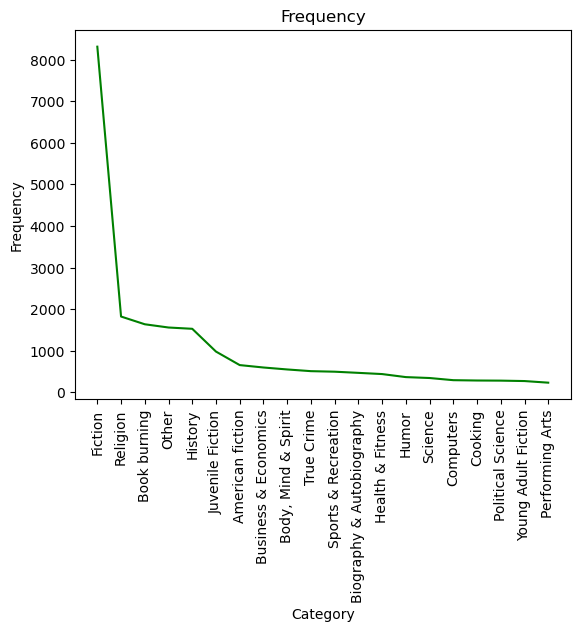

In [86]:
import matplotlib.pyplot as plt

category_counts = df_processed['categories'].value_counts().head(20).sort_values(ascending=False)
plt.plot(category_counts.index, category_counts.values, color='green')
plt.title('Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


### Most Reviewed Books 

In [87]:
df_most_review = df_processed[df_processed['review/score'] > 4.0]

In [88]:
df_most_review.shape

(15654, 15)

In [89]:
df_most_review['Title'].nunique()

787

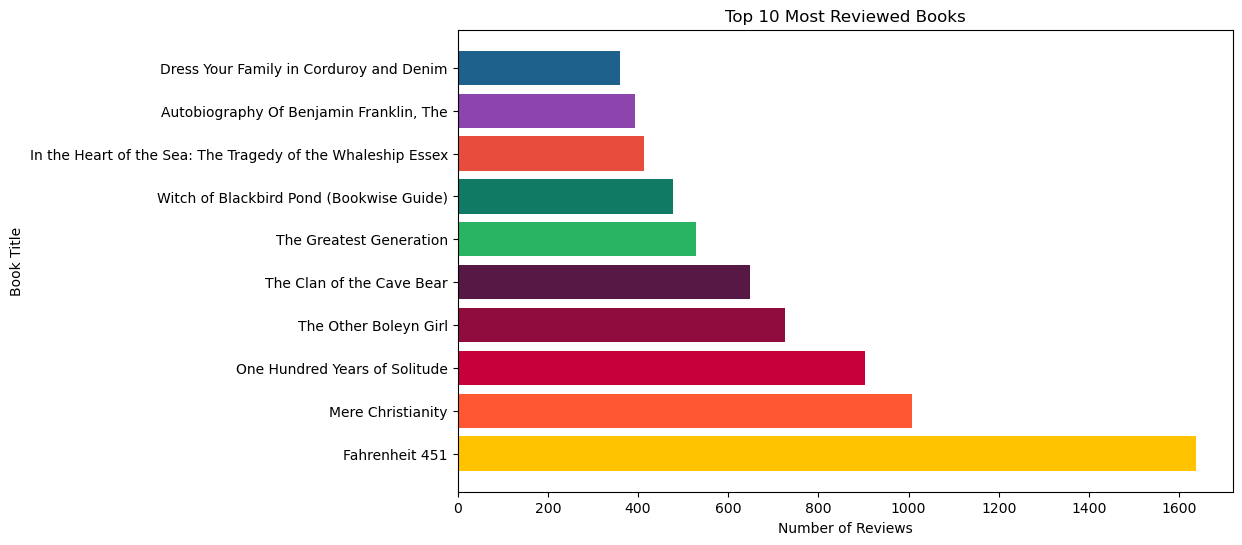

In [90]:
import matplotlib.pyplot as plt

# Get the top 10 most reviewed books
top_books = df_processed['Title'].value_counts().nlargest(10)

# Define colors for the bars
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', 
          '#28B463', '#117A65', '#E74C3C', '#8E44AD', '#1F618D']

# Plot the top 10 most reviewed books using a horizontal bar chart with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_books.index, top_books.values, color=colors)
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Book Title')
ax.set_title('Top 10 Most Reviewed Books')

plt.show()


In [91]:
grouped_df = df_processed.groupby(['categories'])['review/score'].sum().sort_values(ascending=False).reset_index()

In [92]:
grouped_df.head()

,categories,review/score
0,Fiction,34521.0
1,Religion,7982.0
2,Book burning,6805.0
3,Other,6522.0
4,History,6244.0


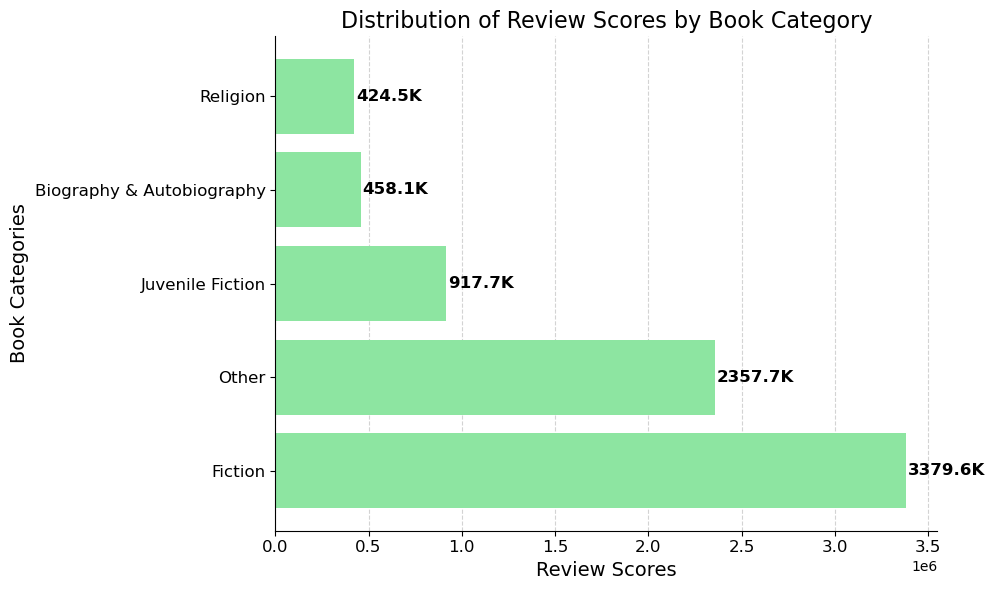

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
categories = ['Fiction', 'Other', 'Juvenile Fiction', 'Biography & Autobiography', 'Religion']
scores = [3379610.0, 2357727.0, 917672.0, 458106.0, 424500.0]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(categories, scores, color=sns.color_palette('pastel')[2])

# Customize the appearance
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(color='lightgrey', linestyle='--')
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Review Scores', fontsize=14)
ax.set_ylabel('Book Categories', fontsize=14)
ax.set_title('Distribution of Review Scores by Book Category', fontsize=16)

# Add annotations to the bars
for i, score in enumerate(scores):
    ax.annotate(f'{score/1000:.1f}K', xy=(score+10000, i), va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [94]:
df_processed.head()

,Id,Title,User_id,review/score,review/summary,review/text,authors,image,publisher,categories,ratingsCount,cleaned_review/text,sentiment_score,score,publishYear
47,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,Religion,5.0,publication everett fergusons book ecclesiolog...,0.9982,4.9910,1996
48,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A36TPZSH8LBT1,5.0,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,Religion,5.0,everett ferguson approach subject early christ...,0.1010,0.5050,1996
49,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ANX3DDV12ZRRU,4.0,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,Religion,5.0,book continual resource biblical simple dr fer...,0.8834,3.5336,1996
50,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A2H2LORTA5EZY2,4.0,Christ is Lord,This is a very useful and thorough text book. ...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,Religion,5.0,useful thorough text book would recommend anyo...,0.6908,2.7632,1996
52,B000JINSBG,A Walk in the Woods: a Play in Two Acts,A15A5KPP3AL76U,5.0,meaty and fast,"This play was excellent. It's very smart, inte...",Lee Blessing,NaN,NaN,Other,3.0,play excellent smart intellectually morally me...,0.9633,4.8165,1988


# Model Building for Recommendation System

In [95]:
import pickle
df_processed = pd.read_csv('user_based_recommendation.csv')
x = df_processed.groupby('User_id').count()['review/text'] > 200
considerable_users = x[x].index
filtered_rating = df_processed[df_processed['User_id'].isin(considerable_users)]

y = filtered_rating.groupby('Title').count()['review/text']>=50
famous_books = y[y].index
df = filtered_rating[filtered_rating['Title'].isin(famous_books)]

df.head()

,Unnamed: 0,Id,Title,User_id,review/score,review/summary,review/text,authors,image,publisher,publishedDate,categories,ratingsCount,cleaned_review/text,sentiment_score,score


In [96]:
df = df.reset_index()
df.shape

(0, 17)

## Distribution of Sentiment Score

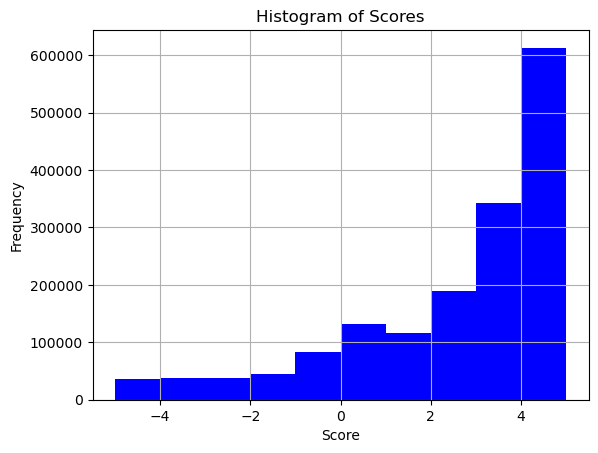

In [42]:
df_processed['score'].hist(color='blue')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [4]:
pip install -U scikit-surprise


## KNN with Means

In [5]:
from surprise import Dataset, Reader
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
df = df.loc[~((df['review/score'].isin([1,2])) & (df['sentiment_score'] > 0.6))]
df = df.loc[~((df['review/score'].isin([4,5])) & (df['sentiment_score'] < 0.6))]
df.shape

(3366, 17)

In [7]:
from collections import defaultdict

In [8]:
def precision_recall_at_k(predictions, k=10, threshold=3):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        user_ratings.sort(key=lambda x: x[0], reverse=True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [9]:
reader = Reader(line_format='user item rating', sep=',')

In [12]:
data = Dataset.load_from_df(df[['User_id', 'Id', 'score']], reader=reader)

In [13]:
trainset, testset = train_test_split(data, test_size=.25)

In [14]:
raw_ratings = data.raw_ratings
raw_ratings[:5]

[('A20EEWWSFMZ1PN', 'B000TZ19TC', 4.556, None),
 ('A2E3GFHUDNPYDH', 'B000TZ19TC', 3.3335, None),
 ('AI37YX1U4KB1L', 'B000TZ19TC', 4.9115, None),
 ('A2NJO6YE954DBH', 'B000TZ19TC', 4.9205, None),
 ('A3MV1KKHX51FYT', 'B000TZ19TC', -2.8767, None)]

In [15]:
model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [16]:
#Saving the model
knnWithMeansModel = open('knnWithMeansModel', 'wb') 
      
# source, destination 
pickle.dump(model, knnWithMeansModel)  

# close the file
knnWithMeansModel.close()

In [17]:
from surprise import accuracy
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 0.7387


In [18]:
predictions[:5]

[Prediction(uid='AHXAPVSHPJ6OJ', iid='0816156921', r_ui=3.6168, est=4.565781453694312, details={'actual_k': 17, 'was_impossible': False}),
 Prediction(uid='A1D2C0WDCSHUWZ', iid='B000NWQ3RY', r_ui=3.8184, est=3.8184, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A370Z6I5GBWU44', iid='B000Q032UY', r_ui=2.8404, est=4.0368196007785215, details={'actual_k': 19, 'was_impossible': False}),
 Prediction(uid='A3OH101U0CPUC7', iid='B000F6H01Q', r_ui=4.972, est=4.9139182311454865, details={'actual_k': 21, 'was_impossible': False}),
 Prediction(uid='A2F540P3L6P5CL', iid='0606015825', r_ui=3.8992, est=3.3488886127583406, details={'actual_k': 4, 'was_impossible': False})]

In [19]:
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=2)

In [20]:
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

0.9432989690721649
0.7451817624177257


In [30]:
user_id = 'A20EEWWSFMZ1PN'

items = df['Id'].unique()

item_ratings = {}
for item in items:
    predicted_rating = model.predict(user_id, item).est
    item_ratings[item] = predicted_rating

top_items = sorted(item_ratings.items(), key=lambda x: x[1], reverse=True)[:40]

books = []
count = 0
for i, item in enumerate(top_items):
    if count == 5:
        break
    if df[df['Id']==item[0]].iloc[0].Title not in books:
        books.append(df[df['Id']==item[0]].iloc[0].Title)
        count += 1


In [32]:
df_processed = df_processed.dropna(subset=['image'])
df_processed['image'].isnull().sum()
df_processed['review/text'][]

0     With the publication of Everett Ferguson's boo...
1     Everett Ferguson approaches the subject of ear...
2     This book is a continual resource. It is so bi...
3     This is a very useful and thorough text book. ...
7     Ironically, I grew up in a small town close to...
8     This book gave me a glimpse at life on The Far...
9     This book contains true accounts from former r...
10    I really liked hearing from my old friends. Th...
11    Gave me a detailed vision of day to day life i...
12    Brought back warm memories of my brief stay at...
13    Well written chronicles of The Farm from the p...
14    This book is a collection of oral histories an...
15    i have a copy of this book and love it and can...
16    loved this book, first hand accounts, blazingl...
17    Inspirational, informative, warm in places, fu...
Name: review/text, dtype: object

In [33]:
df_processed['review/text'][13]

"Well written chronicles of The Farm from the people who lived it. Excellent photos as well.I kept looking for a photo of me and my then-wife, but I wasn't there long enough. But shewas :-)"

IndexError: index 0 is out of bounds for axis 0 with size 0

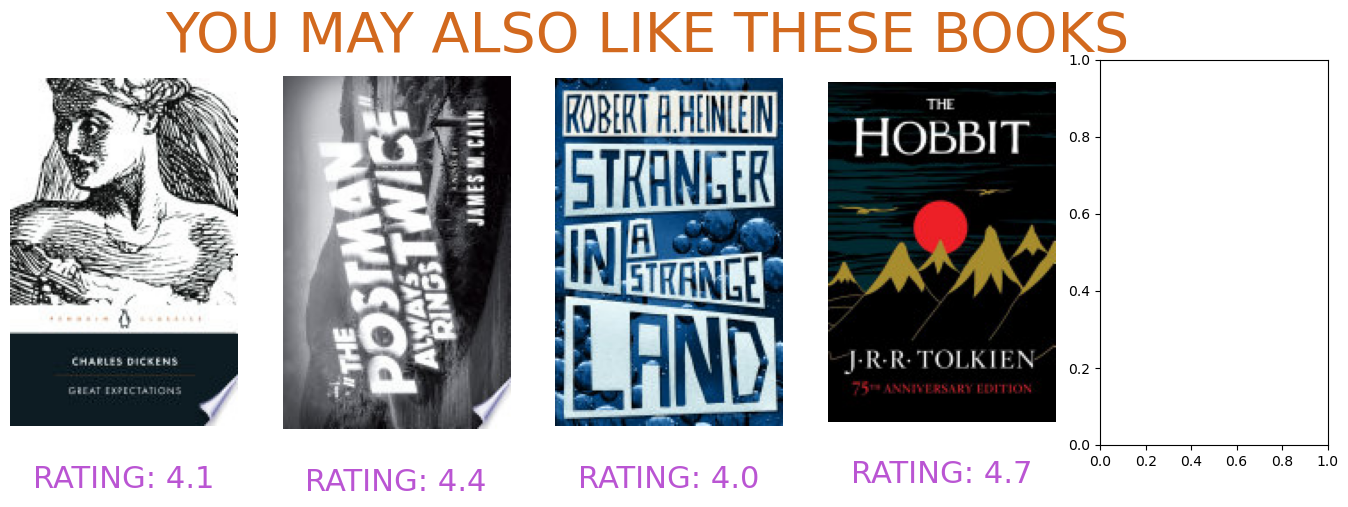

In [29]:
import requests

from PIL import Image
fig,ax=plt.subplots(1,5,figsize=(17,5))
fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="chocolate")

for i in range(len(books)):

    url=df_processed.loc[df_processed["Title"]==books[i],"image"][:1].values[0]
    if url != 'Image not found': 
        img=Image.open(requests.get(url,stream=True).raw)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {}".format(round(df_processed[df_processed["Title"]==books[i]]["review/score"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=22)
    else:
        img = Image.open(requests.get('https://as1.ftcdn.net/v2/jpg/04/34/72/82/1000_F_434728286_OWQQvAFoXZLdGHlObozsolNeuSxhpr84.jpg',stream=True).raw)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(df_processed[df_processed["Title"]==books["Title"].tolist()[i]]["review/score"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)


In [45]:
user_id = 'A20EEWWSFMZ1PN'

# Get the list of all items (books) in the dataset
items = df['Id'].unique()

# Predict the rating the user would give to each item and store in a dictionary
item_ratings = {}
for item in items:
    predicted_rating = model.predict(user_id, item).est
    item_ratings[item] = predicted_rating

top_items = sorted(item_ratings.items(), key=lambda x: x[1], reverse=True)[:5]
searched_books = []
print(top_items)
# Print the top recommended items
for i, item in enumerate(top_items):
    item_id = item[0]
    item_title = df[df['Id'] == item_id].iloc[0]['Title']
    item_image = df[df['Id'] == item_id].iloc[0]['image']
    item_rating = item[1]
    searched_books.append(item_title)
    print(f"{i+1}. {item_id} ({item_title}) with predicted rating of {item_rating:.2f}")
    print(f"   Image: {item_image}")
print(searched_books)
    #

[('0394556380', 5), ('B000O1BDL0', 5), ('B000BT75T4', 5), ('B000NZRFKU', 5), ('B000P3VDGM', 5)]
1. 0394556380 (The Postman Always Rings Twice) with predicted rating of 5.00
   Image: http://books.google.com/books/content?id=ATG99XjemiUC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api
2. B000O1BDL0 (The Postman Always Rings Twice) with predicted rating of 5.00
   Image: http://books.google.com/books/content?id=ATG99XjemiUC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api
3. B000BT75T4 (The Postman Always Rings Twice) with predicted rating of 5.00
   Image: http://books.google.com/books/content?id=ATG99XjemiUC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api
4. B000NZRFKU (The Postman Always Rings Twice) with predicted rating of 5.00
   Image: http://books.google.com/books/content?id=ATG99XjemiUC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api
5. B000P3VDGM (The Postman Always Rings Twice) with predicted rating of 5.00
   Image: http://books.google.c

In [55]:
df[['image']] = df[['image']].fillna(value='Image not found')

In [58]:
df.to_csv('user_data.csv')

In [59]:
df.isnull().sum()

index                    0
Unnamed: 0               0
Id                       0
Title                    0
User_id                  0
review/score             0
review/summary           0
review/text              0
authors                  0
image                    0
publisher              431
publishedDate          190
categories               0
ratingsCount             0
cleaned_review/text      0
sentiment_score          0
score                    0
dtype: int64

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [64]:
df_processed.head()

,Unnamed: 0,Id,Title,User_id,review/score,review/summary,review/text,authors,image,publisher,publishedDate,categories,ratingsCount,cleaned_review/text,sentiment_score,score
0,47,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,publication everett fergusons book ecclesiolog...,0.9982,4.9910
1,48,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A36TPZSH8LBT1,5.0,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,everett ferguson approach subject early christ...,0.1010,0.5050
2,49,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ANX3DDV12ZRRU,4.0,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,book continual resource biblical simple dr fer...,0.8834,3.5336
3,50,0802841899,The Church of Christ: A Biblical Ecclesiology ...,A2H2LORTA5EZY2,4.0,Christ is Lord,This is a very useful and thorough text book. ...,Everett Ferguson,http://books.google.com/books/content?id=kVqRa...,Wm. B. Eerdmans Publishing,1996,Religion,5.0,useful thorough text book would recommend anyo...,0.6908,2.7632
4,52,B000JINSBG,A Walk in the Woods: a Play in Two Acts,A15A5KPP3AL76U,5.0,meaty and fast,"This play was excellent. It's very smart, inte...",Lee Blessing,NaN,NaN,1988,Other,3.0,play excellent smart intellectually morally me...,0.9633,4.8165


## Experimenting Sentiment Analysis for Different Machine Learning Algorithms

In [69]:
df_processed = df_processed.dropna(subset=['cleaned_review/text'])
df_processed['cleaned_review/text'].isnull().sum()


0

In [77]:
df_processed_subset = df_processed.sample(n = 50, random_state=42, ignore_index=True)
df_processed_subset.shape

(50, 16)

In [78]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_processed['cleaned_review/text'])

tfidf = TfidfTransformer()
X = tfidf.fit_transform(X)

y = df_processed['review/score']


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), SVC()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model.__class__.__name__)
    print('Accuracy:', accuracy)
    print(report)


C:\Users\aishw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Accuracy: 0.6706916922248137
              precision    recall  f1-score   support

         1.0       0.58      0.54      0.56     21576
         2.0       0.39      0.21      0.27     16893
         3.0       0.41      0.23      0.29     28075
         4.0       0.46      0.25      0.32     64436
         5.0       0.73      0.93      0.82    195726

    accuracy                           0.67    326706
   macro avg       0.52      0.43      0.45    326706
weighted avg       0.62      0.67      0.63    326706



In [ ]:
reviews = ['This product is amazing!', 'This product is terrible!']
X_new = vectorizer.transform(reviews)
X_new = tfidf.transform(X_new)

for model in models:
    y_new = model.predict(X_new)
    print(model.__class__.__name__)
    print(y_new)


## RMSE reffered from Research Paper for Different Algo for Recommendation System

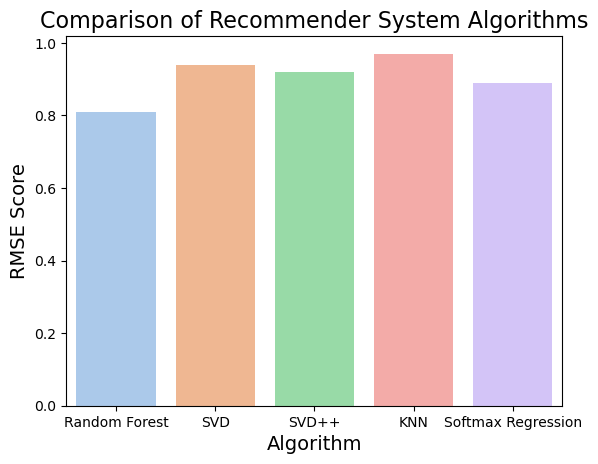

In [45]:
df = pd.DataFrame({
    'Algorithm': ['Random Forest', 'SVD', 'SVD++', 'KNN', 'Softmax Regression'],
    'RMSE Score': [0.81, 0.94, 0.92, 0.97, 0.89]
})

# set color scheme
colors = sns.color_palette('pastel')

# create barplot
ax = sns.barplot(x='Algorithm', y='RMSE Score', data=df, palette=colors)

# add labels and title
ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('RMSE Score', fontsize=14)
ax.set_title('Comparison of Recommender System Algorithms', fontsize=16)

# display plot
plt.show()